# Exploratory data analysis
### Here we present descriptions of the relations between some continuous variables and the output variable

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
data_train=pd.read_csv('train_V2.csv')

In [3]:
def transition(x):
    if x<=4:
        return '0-4'
    elif x<=10:
        return'5-10'
    elif x<=15:
        return '11-15'
    elif x<=20:
        return '16-20'
    elif x>=20:
        return '20-'

In [4]:
A=['boosts','assists','revives']
for  i  in range(len(A)):
    df=data_train.loc[:,[A[i],'winPlacePerc']]
    df[A[i]+'_grouped']=pd.DataFrame(list(map(transition,df[A[i]])))
    df_1=df.loc[:,[A[i]+'_grouped','winPlacePerc']].groupby(A[i]+'_grouped').agg(['count','mean','std'])
    print(df_1)

               winPlacePerc                    
                      count      mean       std
boosts_grouped                                 
0-4                 4184503  0.446616  0.296667
11-15                  2853  0.951439  0.069561
16-20                    68  0.929750  0.112724
20-                      10  0.844290  0.299594
5-10                 259531  0.889951  0.111560
                winPlacePerc                    
                       count      mean       std
assists_grouped                                 
0-4                  4442316  0.472423  0.307227
11-15                     72  0.711972  0.262739
16-20                      3  0.611100  0.346958
20-                        2  0.750000  0.070711
5-10                    4572  0.855781  0.231482
                winPlacePerc                    
                       count      mean       std
revives_grouped                                 
0-4                  4445956  0.472771  0.307399
11-15                     65

In [5]:
a=data_train['DBNOs'].unique()
def trans_DBNOs(x):
    if x<=10:
        return '0-10'
    elif x<=20:
        return'11-20'
    elif x<=30:
        return '21-30'
    elif x<=40:
        return '31-40'
    elif x<=50:
        return '41-50'
    elif x>50:
            return '51-'

In [6]:
df=data_train.loc[:,['DBNOs','winPlacePerc']]
df['DBNOs_grouped']=pd.DataFrame(list(map(trans_DBNOs,df['DBNOs'])))
df_1=df.loc[:,['DBNOs_grouped','winPlacePerc']].groupby('DBNOs_grouped').agg(['count','mean','std'])
df_1

winPlacePerc                    
                     count      mean       std
DBNOs_grouped                                 
0-10               4444847  0.472650  0.307334
11-20                 1993  0.836532  0.234954
21-30                  106  0.761905  0.256460
31-40                   18  0.817256  0.226396
51-                      1  1.000000       NaN

### The rate of kills

Here we will create a categorical (ordinal) by creating a ins for the "kills" variable, then we will calculate the rate of each bin in order to have an idea which category contain most of users.

In [7]:
def trans_DBNOs(x):
    if x<=2:
        return '0-2'
    elif x<=4:
        return '2-4'
    elif x<=6:
        return '4-6'
    elif x<=8:
        return '6-8'
    elif x<=10:
        return '8-10'
    elif x<=20:
        return'11-20'
    elif x<=30:
        return '21-30'
    elif x<=40:
        return '31-40'
    elif x<=50:
        return '41-50'
    elif x>50:
            return '51-'





df=data_train.loc[:,['kills','winPlacePerc']]
df['kills_grouped']=pd.DataFrame(list(map(trans_DBNOs,df['kills'])))
df_1=df.loc[:,['kills_grouped','winPlacePerc']].groupby('kills_grouped').agg(['count','mean','std'])


In [8]:
A=df_1['winPlacePerc']
A['Rate%']=(A['count']/np.sum(A['count']))*100
A

C:\Users\HAMCHTKOU\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,count,mean,std,Rate%
kills_grouped,,,,
0-2,3930266,0.433982,0.295049,88.380862
11-20,7877,0.898940,0.184969,0.177132
2-4,356984,0.728586,0.237509,8.027587
21-30,361,0.829545,0.224693,0.008118
31-40,69,0.853707,0.186579,0.001552
4-6,104537,0.837343,0.184268,2.350749
41-50,20,0.905995,0.127399,0.000450
51-,13,0.965931,0.067904,0.000292
6-8,34595,0.888426,0.155526,0.777946


## Distribution of kills variable

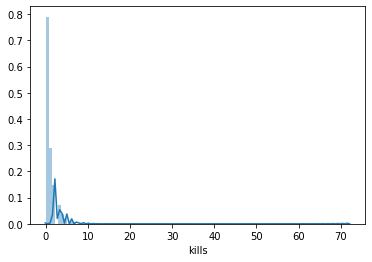

In [9]:
y=data_train['kills']

import seaborn as sns 
fig,ax=plt.subplots()
sns.distplot(y,bins=100,ax=ax)

## Distrubution of the output variable

C:\Users\HAMCHTKOU\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\HAMCHTKOU\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\HAMCHTKOU\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\HAMCHTKOU\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


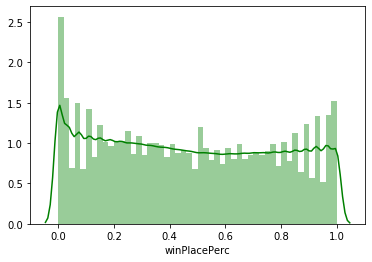

In [10]:
y=data_train['winPlacePerc']
fig,ax=plt.subplots()
sns.distplot(y,bins=50,ax=ax,color='green')

Text(0, 0.5, 'The count')

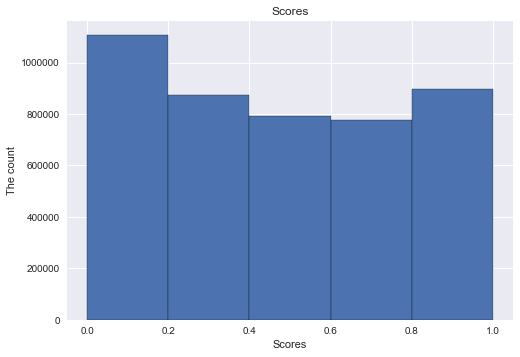

In [11]:
plt.style.use('seaborn')
bins=[0,0.2,0.4,0.6,0.8,1]
plt.hist(df['winPlacePerc'],bins=bins,edgecolor='black')
plt.title('Scores')
plt.xlabel('Scores')
plt.ylabel('The count')

## Match_Type vs WinPlacePrc

In [12]:
A=pd.DataFrame(data_train.loc[:,['matchType','winPlacePerc']])

In [13]:
A_grouped=A.groupby('matchType').count()
A_grouped.sort_values('winPlacePerc')

,winPlacePerc
matchType,
normal-duo,199
normal-solo,326
crashtpp,371
normal-squad,516
flarefpp,718
normal-solo-fpp,1682
flaretpp,2505
normal-duo-fpp,5489
crashfpp,6287


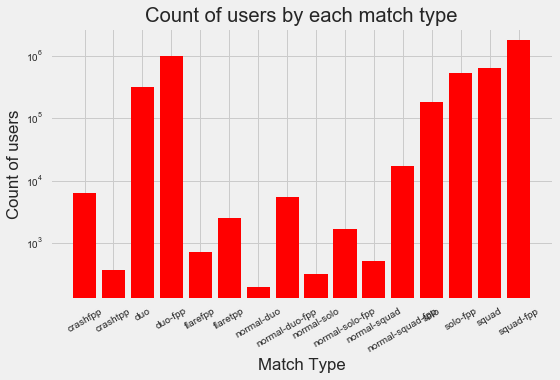

In [14]:
plt.style.use('fivethirtyeight')
Match_Type=A_grouped.index
x_indexes=np.arange(len(Match_Type))
score=A_grouped['winPlacePerc']
plt.bar(x_indexes,score,color='r',log=True)
plt.xticks(ticks=x_indexes,labels=Match_Type,rotation=30)
plt.title("Count of users by each match type")
plt.xlabel('Match Type')
plt.ylabel('Count of users')
plt.tight_layout()

## The rate of good players by each match type 

In [15]:
df=data_train.loc[:,['matchType','winPlacePerc']]
B=df[df['winPlacePerc']>=0.8]
B_grouped=B.groupby('matchType').count()

In [16]:
A_merged=pd.merge(A_grouped,B_grouped, on=A_grouped.index)
A_merged['rate']=A_merged['winPlacePerc_y']/A_merged['winPlacePerc_x']
A_merged.sort_values('rate')

,key_0,winPlacePerc_x,winPlacePerc_y,rate
5,flaretpp,2505,464,0.185230
14,squad,626526,123725,0.197478
4,flarefpp,718,142,0.197772
12,solo,181943,36181,0.198859
0,crashfpp,6287,1261,0.200573
15,squad-fpp,1756186,353073,0.201045
13,solo-fpp,536761,108247,0.201667
3,duo-fpp,996691,203078,0.203752
2,duo,313591,63952,0.203934
1,crashtpp,371,77,0.207547


## Feature Engineering

To choose the features for ou model we will rely on the correlation (>0.5)

In [17]:
a=data_train.columns
a=list(a)
a.remove('winPlacePerc')
data=data_train.loc[:,a]
A=data_train.corr()['winPlacePerc']
A=pd.DataFrame(A)
A[np.abs(A['winPlacePerc'])>0.5]

,winPlacePerc
boosts,0.634234
killPlace,-0.719069
walkDistance,0.810888
weaponsAcquired,0.583806
winPlacePerc,1.000000


In [18]:
A=data_train.loc[:,['groupId','matchId','walkDistance']]
A=A.groupby(['groupId','matchId']).mean()
A=A.reset_index()
data_train=data_train.drop('walkDistance',axis=1)
B=pd.merge(A,data_train,on=['groupId','matchId'])

In [19]:
C=B.loc[:,['groupId','matchId','boosts']]
C=C.groupby(['groupId','matchId']).mean()
C=C.reset_index()
B=B.drop('boosts',axis=1)
D=pd.merge(C,B,on=['groupId','matchId'])

In [20]:
E=D.loc[:,['groupId','matchId','killPlace']]
E=E.groupby(['groupId','matchId']).mean()
E=E.reset_index()
D=D.drop('killPlace',axis=1)
F=pd.merge(E,D,on=['groupId','matchId'])

In [21]:
G=F.loc[:,['groupId','matchId','weaponsAcquired']]
G=G.groupby(['groupId','matchId']).mean()
G=G.reset_index()
F=F.drop('weaponsAcquired',axis=1)
H=pd.merge(G,F,on=['groupId','matchId'])

In [22]:
a=H.columns
a=list(a)
a.remove('winPlacePerc')
data=H.loc[:,a]
A=H.corr()['winPlacePerc']
A=pd.DataFrame(A)
A[np.abs(A['winPlacePerc'])>0.5]

,winPlacePerc
weaponsAcquired,0.675383
killPlace,-0.820770
boosts,0.716078
walkDistance,0.841037
winPlacePerc,1.000000


### Encoding categorical variables( matchId and groupId)

In [32]:
from sklearn.feature_extraction import FeatureHasher
h=FeatureHasher(n_features=20,input_type='string')
f=h.transform(H['matchId'])

In [33]:
import numpy as np
f.toarray()

array([[ 5.,  1.,  0., ...,  0.,  0.,  1.],
       [ 5.,  1.,  0., ...,  0.,  0.,  1.],
       [ 5.,  1.,  0., ...,  0.,  0.,  1.],
       ...,
       [ 2.,  2.,  0., ..., -3.,  0.,  4.],
       [ 2.,  2.,  0., ..., -3.,  0.,  4.],
       [ 5., -1.,  0., ..., -1.,  0.,  1.]])

In [34]:
g=h.transform(H['groupId'])

In [35]:
x=np.array(H.loc[:,['weaponsAcquired','killPlace','boosts','walkDistance']])

In [36]:
gg=g.toarray()
ff=f.toarray()

In [54]:
X=np.concatenate((gg,ff,x),axis=1)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.decomposition import PCA
y=H['winPlacePerc']

X_train,X_test,y_train,y_test=train_test_split(x,y)
y_train=pd.DataFrame(y_train)
y_train.fillna(np.mean(y_train),inplace=True)
y_train=np.array(y_train)
y_train=y_train.reshape((3335224,))

y_test=pd.DataFrame(y_test)
y_test.fillna(np.mean(y_test),inplace=True)
y_test=np.array(y_test)
y_test=y_test.reshape((1111742,))

model=GradientBoostingRegressor(n_estimators=50,max_depth=7)
model.fit(X_train,y_train)




GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=7,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [56]:
y_predict_train=model.predict(X_train)
y_predict_test=model.predict(X_test)
print(MAE(y_train,y_predict_train))
print(MAE(y_test,y_predict_test))


0.07496882751933184
0.07516330894944888
